<a href="https://colab.research.google.com/github/alivianay/retail-forecast-PSD/blob/main/retail_forecasting_PSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d rmisra/retail-store-inventory-forecasting-dataset -p ./data --unzip


403 Client Error: Forbidden for url: https://www.kaggle.com/api/v1/datasets/metadata/rmisra/retail-store-inventory-forecasting-dataset


In [ ]:
from google.colab import files
import json
import os


uploaded = files.upload()


os.makedirs('/root/.kaggle', exist_ok=True)
os.rename('kaggle.json', '/root/.kaggle/kaggle.json')
os.chmod('/root/.kaggle/kaggle.json', 600)

print("Kaggle API configured successfully!")

Saving kaggle.json to kaggle.json
Kaggle API configured successfully!


In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d anirudhchauhan/retail-store-inventory-forecasting-dataset

Dataset URL: https://www.kaggle.com/datasets/anirudhchauhan/retail-store-inventory-forecasting-dataset
License(s): CC0-1.0
retail-store-inventory-forecasting-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:

import zipfile
with zipfile.ZipFile('retail-store-inventory-forecasting-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

import pandas as pd
data = pd.read_csv('retail_store_inventory.csv')
print(data.head())

         Date Store ID Product ID     Category Region  Inventory Level  \
0  2022-01-01     S001      P0001    Groceries  North              231   
1  2022-01-01     S001      P0002         Toys  South              204   
2  2022-01-01     S001      P0003         Toys   West              102   
3  2022-01-01     S001      P0004         Toys  North              469   
4  2022-01-01     S001      P0005  Electronics   East              166   

   Units Sold  Units Ordered  Demand Forecast  Price  Discount  \
0         127             55           135.47  33.50        20   
1         150             66           144.04  63.01        20   
2          65             51            74.02  27.99        10   
3          61            164            62.18  32.72        10   
4          14            135             9.26  73.64         0   

  Weather Condition  Holiday/Promotion  Competitor Pricing Seasonality  
0             Rainy                  0               29.69      Autumn  
1           

In [ ]:
data.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [ ]:
data.shape

(73100, 15)

In [ ]:
data.columns

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality'],
      dtype='object')

In [ ]:
le=LabelEncoder()
data['Store ID']=le.fit_transform(data['Store ID'])
data['Product ID']=le.fit_transform(data['Product ID'])
data['Category']=le.fit_transform(data['Category'])
data['Region']=le.fit_transform(data['Region'])
data['Weather Condition']=le.fit_transform(data['Weather Condition'])
data['Seasonality']=le.fit_transform(data['Seasonality'])
#data['Store ID']=le.fit_transform(data['Store ID'])

In [ ]:
data.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,0,0,3,1,231,127,55,135.47,33.50,20,1,0,29.69,0
1,2022-01-01,0,1,4,2,204,150,66,144.04,63.01,20,3,0,66.16,0
2,2022-01-01,0,2,4,3,102,65,51,74.02,27.99,10,3,1,31.32,2
3,2022-01-01,0,3,4,1,469,61,164,62.18,32.72,10,0,1,34.74,0
4,2022-01-01,0,4,1,0,166,14,135,9.26,73.64,0,3,0,68.95,2


In [ ]:
data.isnull().sum()

,0
Date,0
Store ID,0
Product ID,0
Category,0
Region,0
Inventory Level,0
Units Sold,0
Units Ordered,0
Demand Forecast,0
Price,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  int64  
 2   Product ID          73100 non-null  int64  
 3   Category            73100 non-null  int64  
 4   Region              73100 non-null  int64  
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  int64  
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 8.4

In [ ]:
data.describe()

,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,2.000000,9.500000,2.001696,1.497948,274.469877,136.464870,110.004473,141.494720,55.135108,10.009508,1.500575,0.497305,55.146077,1.501806
std,1.414223,5.766321,1.414261,1.118346,129.949514,108.919406,52.277448,109.254076,26.021945,7.083746,1.118041,0.499996,26.191408,1.117159
min,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,20.000000,-9.990000,10.000000,0.000000,0.000000,0.000000,5.030000,0.000000
25%,1.000000,4.750000,1.000000,0.000000,162.000000,49.000000,65.000000,53.670000,32.650000,5.000000,1.000000,0.000000,32.680000,1.000000
50%,2.000000,9.500000,2.000000,1.000000,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,2.000000,0.000000,55.010000,2.000000
75%,3.000000,14.250000,3.000000,2.000000,387.000000,203.000000,155.000000,208.052500,77.860000,15.000000,3.000000,1.000000,77.820000,3.000000
max,4.000000,19.000000,4.000000,3.000000,500.000000,499.000000,200.000000,518.550000,100.000000,20.000000,3.000000,1.000000,104.940000,3.000000


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.drop(columns=['Store ID','Product ID','Date'],axis=1,inplace=True)

##**EDA**

In [ ]:
data['Category'].value_counts()

,count
Category,
2,14699
4,14643
0,14626
3,14611
1,14521


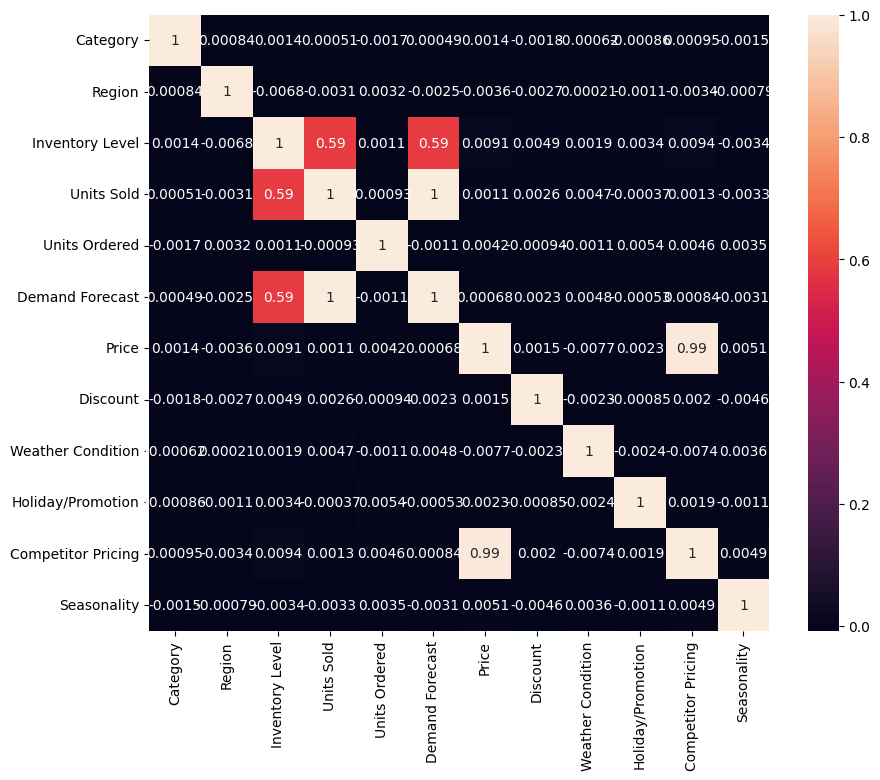

In [ ]:
corr=data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)
plt.show()

##**DATA PREPARATION**



In [ ]:
x=data.drop(columns=['Demand Forecast'])
y=data['Demand Forecast']

In [ ]:
x.head()

,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,3,1,231,127,55,33.50,20,1,0,29.69,0
1,4,2,204,150,66,63.01,20,3,0,66.16,0
2,4,3,102,65,51,27.99,10,3,1,31.32,2
3,4,1,469,61,164,32.72,10,0,1,34.74,0
4,1,0,166,14,135,73.64,0,3,0,68.95,2


In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 0.70588851, -0.44525719, -0.33451587, ..., -0.99462457,
        -0.97193139, -1.34431734],
       [ 1.41297645,  0.44892689, -0.54229028, ..., -0.99462457,
         0.42051951, -1.34431734],
       [ 1.41297645,  1.34311098, -1.32721586, ...,  1.00540448,
        -0.90969682,  0.4459506 ],
       ...,
       [-1.41537533,  1.34311098,  0.02716553, ..., -0.99462457,
        -1.68896534,  1.34108457],
       [ 1.41297645, -1.33944127,  0.76591902, ..., -0.99462457,
         0.02496724, -0.44918337],
       [ 0.70588851, -1.33944127, -1.21178563, ...,  1.00540448,
         0.93061394, -0.44918337]])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train.shape

(58480, 11)

In [ ]:
y_train.value_counts(normalize=True)*100

,proportion
Demand Forecast,
46.06,0.01881
21.84,0.01881
59.44,0.01710
30.68,0.01539
44.81,0.01539
...,...
277.81,0.00171
279.62,0.00171
311.58,0.00171


##**MODELING**

In [ ]:
from tabulate import tabulate
import numpy as np

def evaluate_model(model, x_train, y_train, x_test, y_test):
    # Calculate metrics
    train_r2 = model.score(x_train, y_train)
    y_pred = model.predict(x_test)
    test_r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Calculate RMSE manually
    mae = mean_absolute_error(y_test, y_pred)

    # Prepare the table data
    metrics = [
        ["Training R² Score", f"{train_r2:.4f}"],
        ["Testing R² Score", f"{test_r2:.4f}"],
        ["Mean Squared Error (MSE)", f"{mse:.2f}"],
        ["Root Mean Squared Error (RMSE)", f"{rmse:.2f}"],
        ["Mean Absolute Error (MAE)", f"{mae:.2f}"],
    ]

    # Print the table
    print(tabulate(metrics, headers=["Metric", "Value"], tablefmt="grid"))

In [ ]:
lr = LinearRegression()

lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
evaluate_model(lr, x_train, y_train, x_test, y_test)

+--------------------------------+---------+
| Metric                         |   Value |
+================================+=========+
| Training R² Score              |  0.9937 |
+--------------------------------+---------+
| Testing R² Score               |  0.9937 |
+--------------------------------+---------+
| Mean Squared Error (MSE)       | 74.79   |
+--------------------------------+---------+
| Root Mean Squared Error (RMSE) |  8.65   |
+--------------------------------+---------+
| Mean Absolute Error (MAE)      |  7.47   |
+--------------------------------+---------+


In [ ]:
y_pred_lr = lr.predict(x_test)
print("lr Predictions:", y_pred_lr)

lr Predictions: [143.00485008 109.99035208  75.07592981 ... 350.99739087 230.18590163
 199.0199432 ]


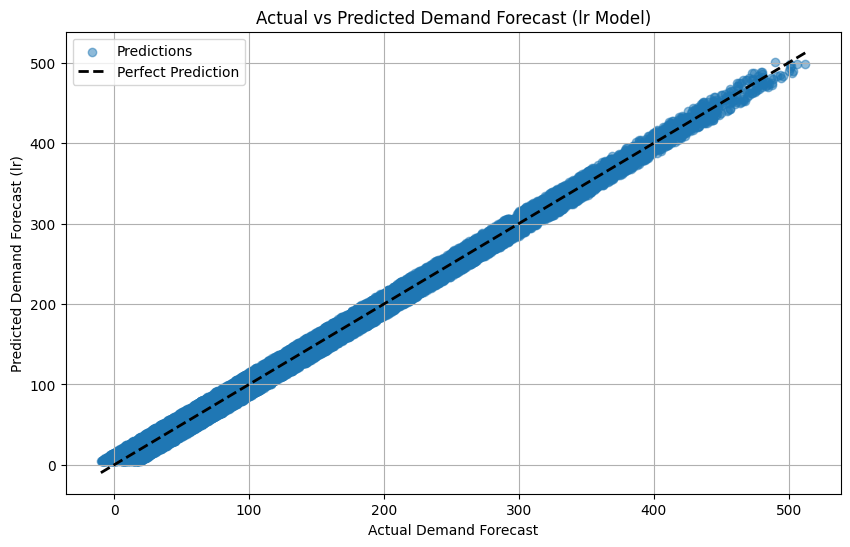

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5, label='Predictions') # Add label for legend
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction') # Add perfect prediction line
plt.xlabel("Actual Demand Forecast")
plt.ylabel("Predicted Demand Forecast (lr)")
plt.title("Actual vs Predicted Demand Forecast (lr Model)")
plt.grid(True)
plt.legend() # Add legend to show labels
plt.show()

In [ ]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train, y_train)

SVR()

In [ ]:
evaluate_model(svr, x_train, y_train, x_test, y_test)

+--------------------------------+----------+
| Metric                         |    Value |
+================================+==========+
| Training R² Score              |   0.9792 |
+--------------------------------+----------+
| Testing R² Score               |   0.9781 |
+--------------------------------+----------+
| Mean Squared Error (MSE)       | 260.54   |
+--------------------------------+----------+
| Root Mean Squared Error (RMSE) |  16.14   |
+--------------------------------+----------+
| Mean Absolute Error (MAE)      |  11.52   |
+--------------------------------+----------+


In [ ]:
y_pred_svr = svr.predict(x_test)
print("SVR Predictions:", y_pred_svr)

SVR Predictions: [142.23258193 106.07445764  73.60544504 ... 342.31574307 236.34749982
 204.55749618]


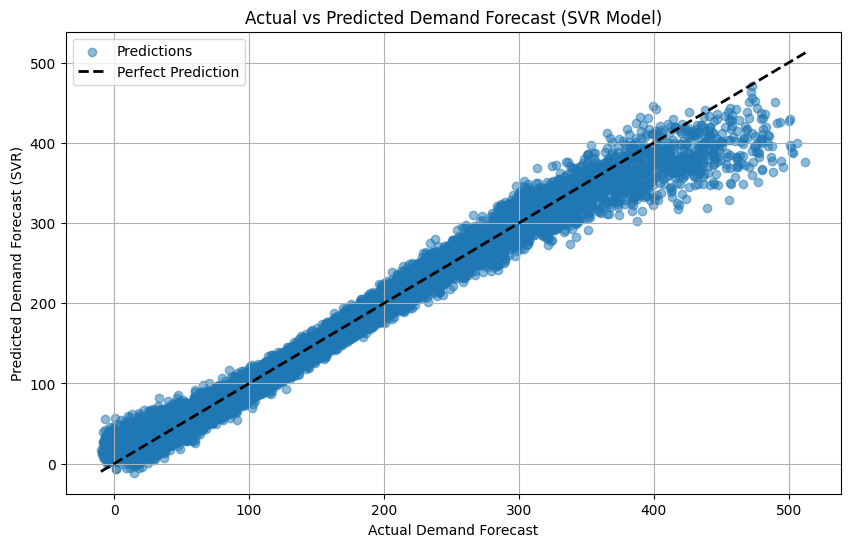

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr, alpha=0.5, label='Predictions') # Add label for legend
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction') # Add perfect prediction line
plt.xlabel("Actual Demand Forecast")
plt.ylabel("Predicted Demand Forecast (SVR)")
plt.title("Actual vs Predicted Demand Forecast (SVR Model)")
plt.grid(True)
plt.legend() # Add legend to show labels
plt.show()

In [ ]:
# Select the columns for multivariate forecasting
multivariate_data = data_copy[['Demand Forecast', 'Units Sold']].resample('D').sum()

# Ensure the index is a DatetimeIndex
multivariate_data.index = pd.to_datetime(multivariate_data.index)

print("Multivariate data head:")
display(multivariate_data.head())

Multivariate data head:


,Demand Forecast,Units Sold
Date,,
2022-01-01,15031.26,14484
2022-01-02,13910.72,13415
2022-01-03,14185.27,13681
2022-01-04,14609.10,14084
2022-01-05,13091.70,12572


In [ ]:
from statsmodels.tsa.api import VAR

# Fit the VAR model
# Determine the appropriate order (p) for the VAR model, often done using information criteria or analyzing PACF
# For simplicity, let's start with a low order, e.g., p=1
model_var = VAR(multivariate_data)
results_var = model_var.fit(1)

print(results_var.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 28, Oct, 2025
Time:                     17:46:38
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    22.8452
Nobs:                     730.000    HQIC:                   22.8220
Log likelihood:          -10390.4    FPE:                8.03831e+09
AIC:                      22.8075    Det(Omega_mle):     7.97264e+09
--------------------------------------------------------------------
Results for equation Demand Forecast
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                  13662.409938       545.065833           25.066           0.000
L1.Demand Forecast         0.183104         0.445939            0.411           0.681
L1.Units Sold             -0.1

In [ ]:
# Make predictions
# Forecast the next 'n' steps (e.g., 30 days)
lag_order = results_var.k_ar
forecast_input = multivariate_data.values[-lag_order:]

predicted_data = results_var.forecast(y=forecast_input, steps=30)

# Convert the predicted data to a pandas DataFrame
predicted_df = pd.DataFrame(predicted_data, index=pd.date_range(start=multivariate_data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D'), columns=multivariate_data.columns)

print("VAR Model Predictions for the next 30 days:")
display(predicted_df)

VAR Model Predictions for the next 30 days:


,Demand Forecast,Units Sold
2024-01-02,14132.146023,13631.680522
2024-01-03,14147.353499,13644.494183
2024-01-04,14148.161521,13645.252607
2024-01-05,14148.192485,13645.279005
2024-01-06,14148.194082,13645.280494
2024-01-07,14148.194145,13645.280548
2024-01-08,14148.194148,13645.280551
2024-01-09,14148.194148,13645.280551
2024-01-10,14148.194148,13645.280551
2024-01-11,14148.194148,13645.280551


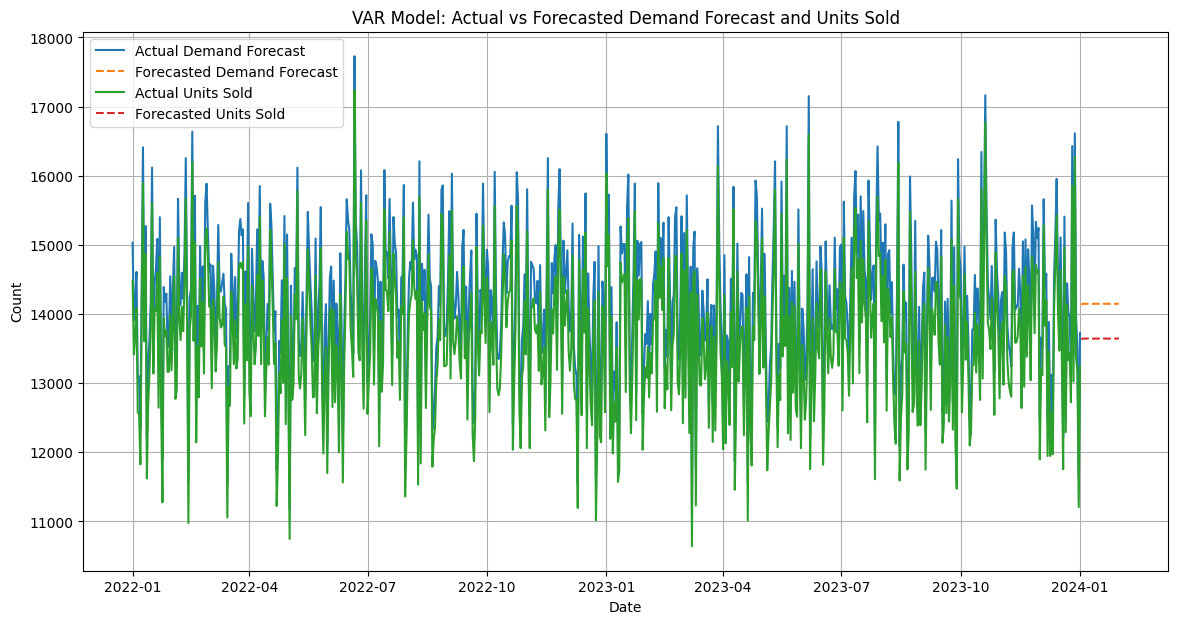

In [ ]:
# Visualize the historical data and the VAR forecasts
plt.figure(figsize=(14, 7))

plt.plot(multivariate_data.index, multivariate_data['Demand Forecast'], label='Actual Demand Forecast')
plt.plot(predicted_df.index, predicted_df['Demand Forecast'], label='Forecasted Demand Forecast', linestyle='--')

plt.plot(multivariate_data.index, multivariate_data['Units Sold'], label='Actual Units Sold')
plt.plot(predicted_df.index, predicted_df['Units Sold'], label='Forecasted Units Sold', linestyle='--')


plt.title('VAR Model: Actual vs Forecasted Demand Forecast and Units Sold')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Evaluate VAR model on historical data
# Note: This evaluates the in-sample fit, not out-of-sample forecasting performance on unseen data

# Get in-sample predictions from the VAR model
in_sample_predictions = results_var.fittedvalues

# Calculate metrics for Demand Forecast
mse_demand = mean_squared_error(multivariate_data['Demand Forecast'][lag_order:], in_sample_predictions['Demand Forecast'])
rmse_demand = np.sqrt(mse_demand)
mae_demand = mean_absolute_error(multivariate_data['Demand Forecast'][lag_order:], in_sample_predictions['Demand Forecast'])

print("Evaluation for Demand Forecast:")
print(f"Mean Squared Error (MSE): {mse_demand:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_demand:.2f}")
print(f"Mean Absolute Error (MAE): {mae_demand:.2f}")

print("-" * 30)

# Calculate metrics for Units Sold
mse_units_sold = mean_squared_error(multivariate_data['Units Sold'][lag_order:], in_sample_predictions['Units Sold'])
rmse_units_sold = np.sqrt(mse_units_sold)
mae_units_sold = mean_absolute_error(multivariate_data['Units Sold'][lag_order:], in_sample_predictions['Units Sold'])

print("Evaluation for Units Sold:")
print(f"Mean Squared Error (MSE): {mse_units_sold:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_units_sold:.2f}")
print(f"Mean Absolute Error (MAE): {mae_units_sold:.2f}")

Evaluation for Demand Forecast:
Mean Squared Error (MSE): 1083292.07
Root Mean Squared Error (RMSE): 1040.81
Mean Absolute Error (MAE): 828.83
------------------------------
Evaluation for Units Sold:
Mean Squared Error (MSE): 1063116.31
Root Mean Squared Error (RMSE): 1031.08
Mean Absolute Error (MAE): 821.14
